# Meaning of Each Event Name

Understanting the various event names is very important for this competition and I couldn't find any notebook or discussion which explains them in enough detail. So in this notebook I've tried my best to describe, clarify and analyze all the important event names according to my understanding using examples from the data and in-game images.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
from PIL import Image

plt.show()

dtypes={'session_id':'int', 
'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.int32,
    'page':'category',
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
     'text':'category',
     'fqid':'category',
     'room_fqid':'category',
     'text_fqid':'category',
     'fullscreen':'category',
     'hq':'category',
     'music':'category',
     'level_group':'category'}

train = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/train.csv', dtype=dtypes)

In [2]:
print()
print('The Most Important Event Names in the data are:')
print()
for i,j in enumerate(['navigate_click','observation_click','notification_click',
 'object_click','object_hover','map_hover','map_click','notebook_click','checkpoint']):
    print(f'{i+1}.', j)


The Most Important Event Names in the data are:

1. navigate_click
2. observation_click
3. notification_click
4. object_click
5. object_hover
6. map_hover
7. map_click
8. notebook_click
9. checkpoint


So let's start!!!

# 1. navigate_click

To move Jo, we click on the place we want her to move to in the room. This is a navigate_click.

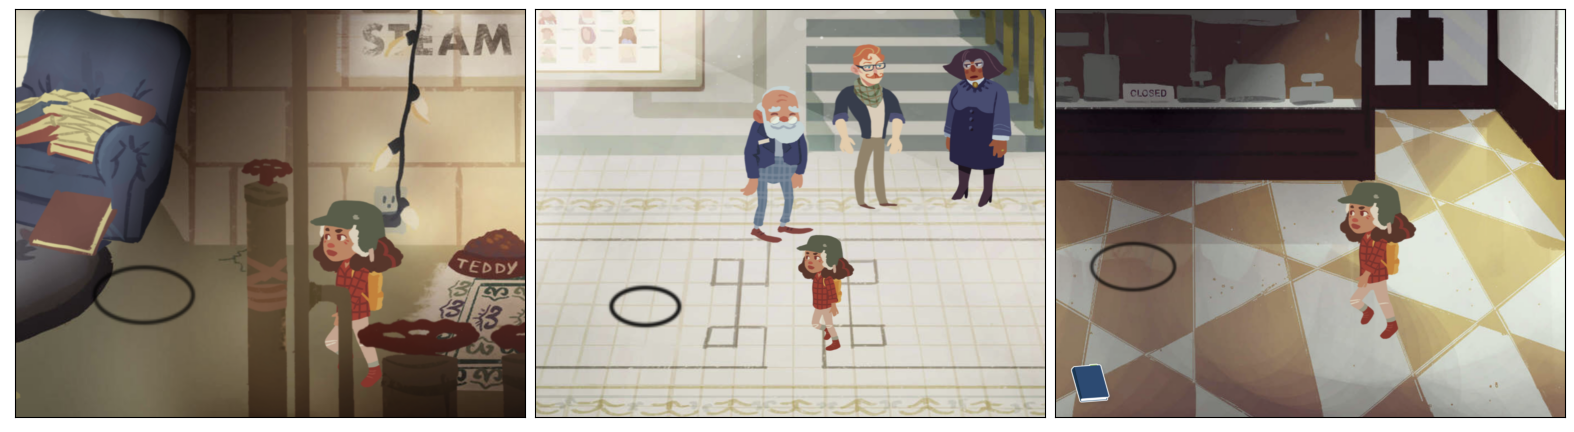

In [3]:
images = os.listdir('../input/event-names/navigate_click1')
images.sort()
img_arr = []

def img_reshape(img):
    img = Image.open('../input/event-names/navigate_click1/'+img).convert('RGB')
    img = img.resize((1000,800))
    img = np.asarray(img)
    return img

for image in images:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Moreover, there are some observations, objects, people, entrances, exits in the game like photos on the wall, teddy, the notebook, the retirement letter, grampa, boss, wells, just to name a few. If you take your mouse pointer near them, a black object appears on top of them as shown in the images below. Clicking on this black object is also a navigate click.

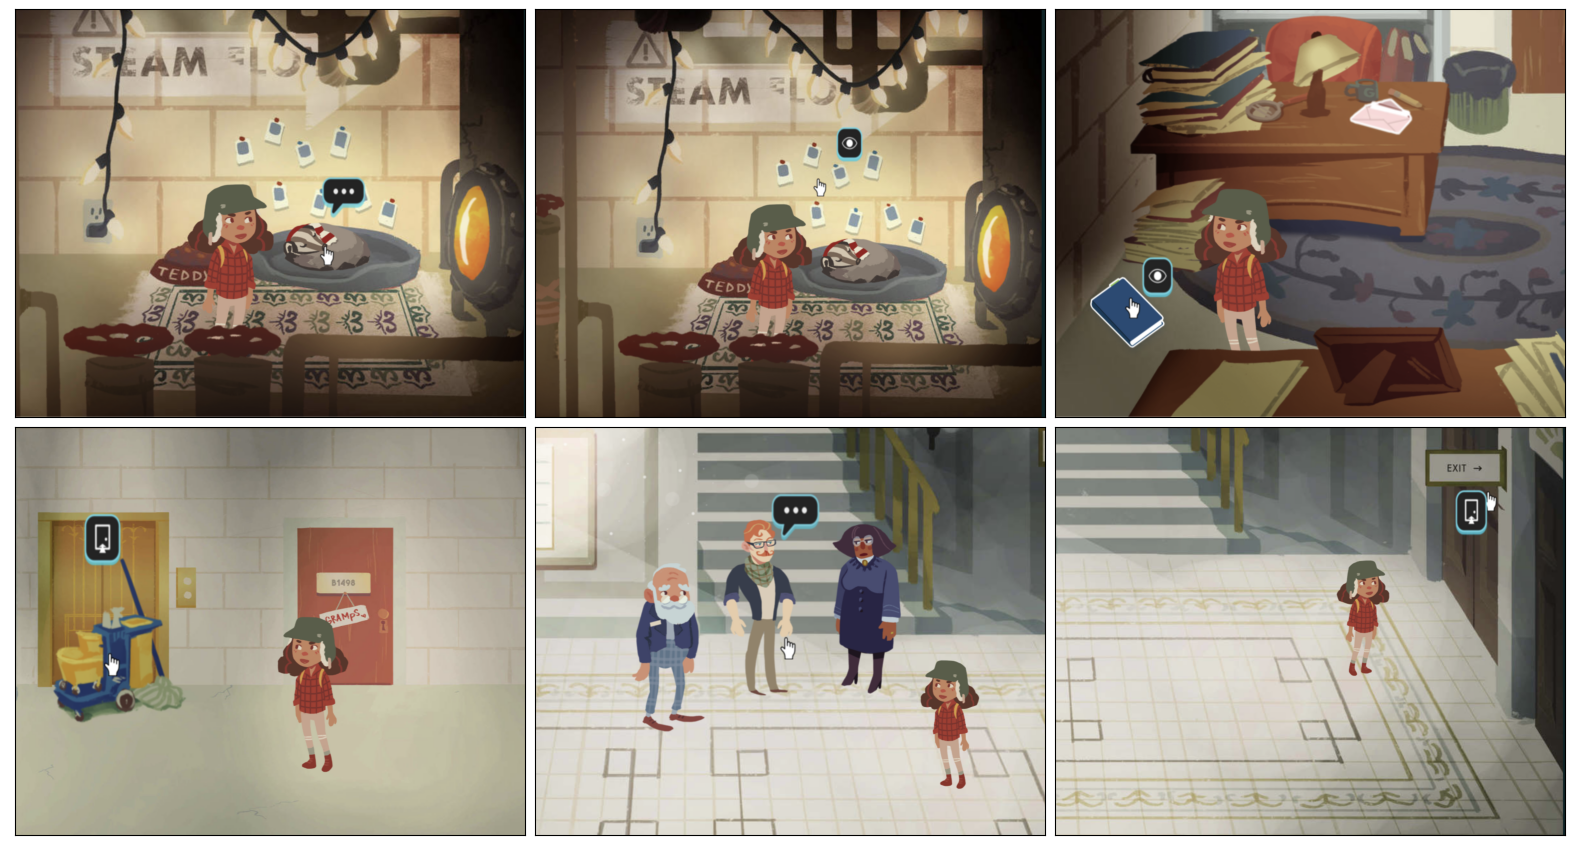

In [4]:
images = os.listdir('../input/event-names/navigate click2')
images.sort()
img_arr = []

def img_reshape(img):
    img = Image.open('../input/event-names/navigate click2/'+img).convert('RGB')
    img = img.resize((1000,800))
    img = np.asarray(img)
    return img

for image in images:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [5]:
print('Example of a navigate_click on the notebook:')
print()
train.iloc[25:27,[0,3,4,12,13]]

Example of a navigate_click on the notebook:



session_id          event_name       name       text      fqid
25  20090312431273200      navigate_click  undefined        NaN  notebook
26  20090312431273200  notification_click      basic  Found it!       NaN

# 2. observation_click

There are some observations in the game like, the photos on the wall, archivist's room when he is not there, etc. If you navigate_click on the black object that appears when you take your mouse pointer close to them as dicsussed in the previous point, a text appears near to the observation. The click you make just after the text appears is an observation_click. This click hides the text (It can be anywhere on the screen).

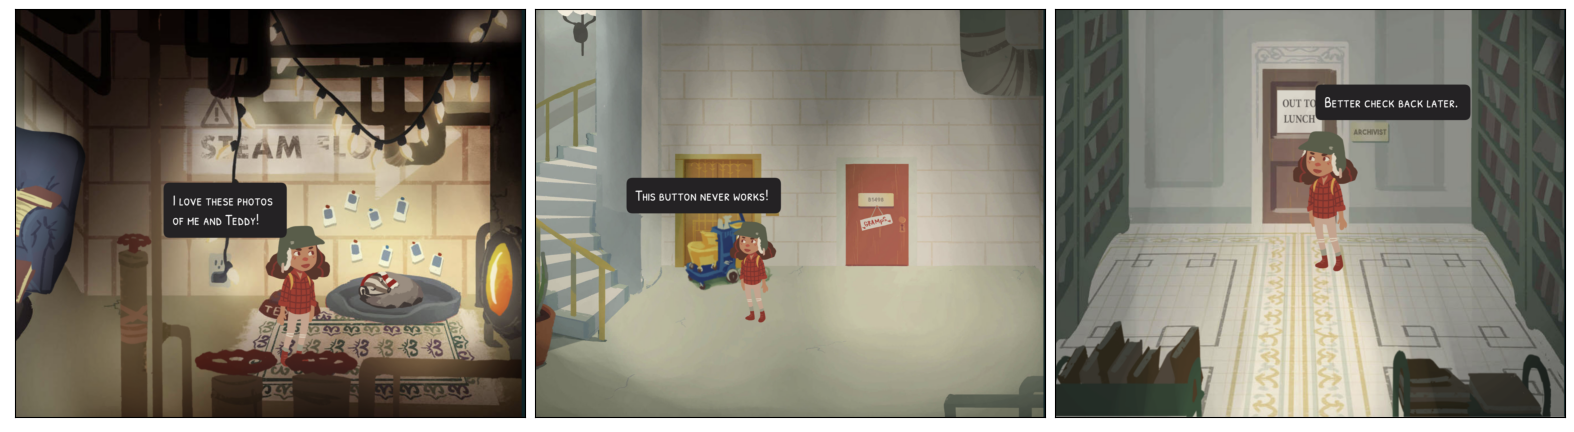

In [6]:
images = os.listdir('../input/event-names/observation_click')
images.sort()
img_arr = []

def img_reshape(img):
    img = Image.open('../input/event-names/observation_click/'+img).convert('RGB')
    img = img.resize((1000,800))
    img = np.asarray(img)
    return img

for image in images:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [7]:
print('Example of an observation_click:')
print()
train.iloc[36:38,[0,3,4,12,13]]

Example of an observation_click:



session_id         event_name       name  \
36  20090312431273200     navigate_click  undefined   
37  20090312431273200  observation_click      basic   

                                text     fqid  
36                               NaN  janitor  
37  Hmm. Button's still not working.  janitor

Note that text also appears when you click on a person like gramps, boss, wells, teddy, etc, but the click after these texts appear is not an observation click. It's either a person_click or a cutscene_click. 

Also, if clicking on the object leads to a conversation between two or more characters, then the clicks to continue the conversation are cutscene_clicks. Ex. Clicking on trigger_coffee, trigger_scarf, etc.

# 3. notification_click

If you navigate click on an object like the notebook, the retirement letter, the slip on the shirt, etc, the object pops up and a text appears at the bottom of the object. The click after the text appears, to hide or to continue is a notification_click. The click can be anywhere on the screen. 

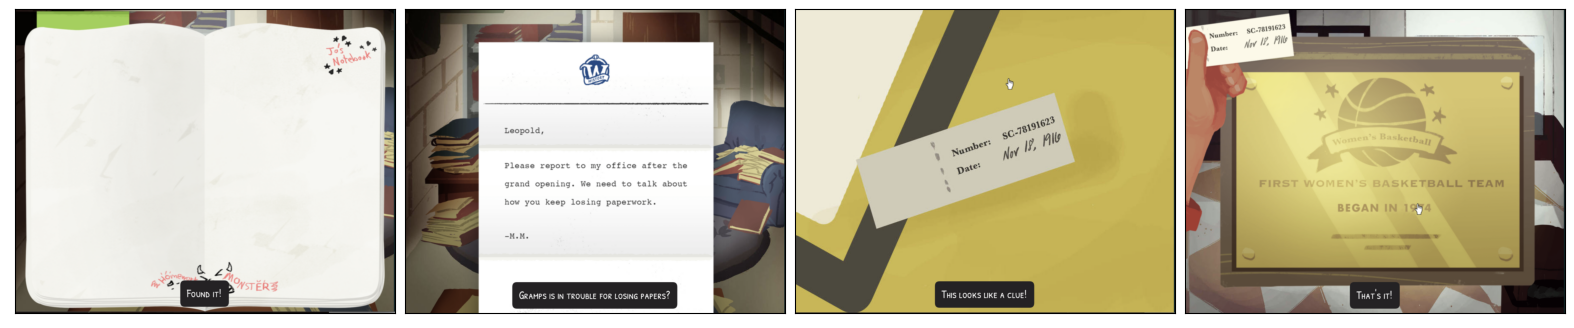

In [8]:
images = os.listdir('../input/event-names/notification click')
images.sort()
img_arr = []

def img_reshape(img):
    img = Image.open('../input/event-names/notification click/'+img).convert('RGB')
    img = img.resize((1000,800))
    img = np.asarray(img)
    return img

for image in images:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [9]:
print('Examples of notification_click:')
print()
train.iloc[84:87,[0,3,4,12,13]]

Examples of notification_click:



session_id          event_name   name  \
84  20090312431273200        object_click  basic   
85  20090312431273200  notification_click  basic   
86  20090312431273200  notification_click  basic   

                                text            fqid  
84                               NaN  tunic.hub.slip  
85           This looks like a clue!             NaN  
86  I'll record this in my notebook.             NaN

# 4. object_click
As discussed in the previous point, whenever you navigate_click on an object, it pops up, and if a text appears, then the clicks to hide or continue the text are notification_clicks. But after that, any click anywhere on the object pop up or a click on the cross to close the object pop up is an object_click.

Note that some objects don't display any text when clicked, so there are no notification_clicks associated with them.

# 5. object_hover

Some tasks have to be performed in the game, like clicking the slip on the t-shirt in the 1st Chapter of the game, etc. Also, to complete these tasks, sometimes we have to click on next or previous buttons like to find the year 1916 on the businesscards in Chapter 2. If we take the mouse pointer above the main object or next/previous buttons, our mouse pointer's design changes as in the images below and hover duration starts getting recorded. When we take the pointer away from there, the recording stops and an object_hover entry is made with the hover_duration. 

Note: When the student clicks the main object or next/previous buttons, an object_click entry is also made.

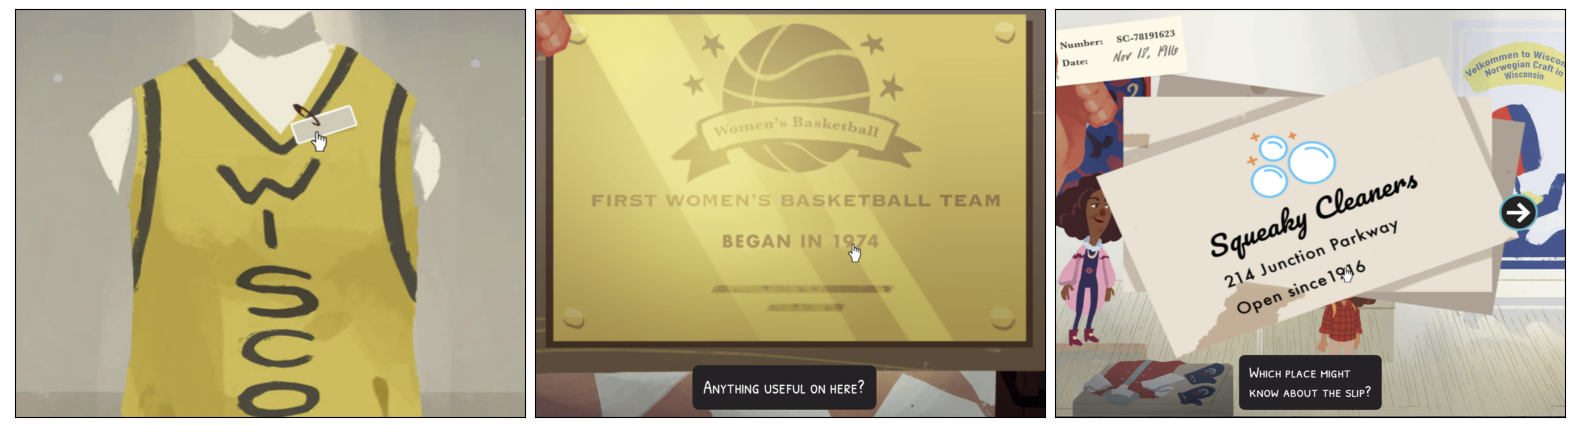

In [10]:
images = os.listdir('../input/event-names/object_hover')
images.sort()
img_arr = []

def img_reshape(img):
    img = Image.open('../input/event-names/object_hover/'+img).convert('RGB')
    img = img.resize((1000,800))
    img = np.asarray(img)
    return img

for image in images:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [11]:
print('Examples of object_hover on the businesscards:')
print()
train.iloc[292:303,[0,3,4,11,13]]

Examples of object_hover on the businesscards:



session_id      event_name       name  hover_duration  \
292  20090312431273200  navigate_click  undefined             NaN   
293  20090312431273200    object_hover  undefined            68.0   
294  20090312431273200    object_hover  undefined            50.0   
295  20090312431273200    object_click      basic             NaN   
296  20090312431273200    object_hover  undefined          1950.0   
297  20090312431273200    object_click      basic             NaN   
298  20090312431273200    object_hover  undefined           867.0   
299  20090312431273200    object_click      basic             NaN   
300  20090312431273200    object_hover  undefined            17.0   
301  20090312431273200    object_hover  undefined            49.0   
302  20090312431273200    object_click      basic             NaN   

                               fqid  
292                   businesscards  
293       businesscards.card_0.next  
294       businesscards.card_0.next  
295       businesscards.card_0.next  
296       businesscards.card_0.next  
297       businesscards.card_1.next  
298       businesscards.card_1.next  
299                   businesscards  
300   businesscards.card_bingo.next  
301   businesscards.card_bingo.next  
302  businesscards.card_bingo.bingo

# 6. map_hover

There is a map in the game too! There are many places on the map a student can click on to go there. Just like object_hover, when he/she takes the pointer above any place in the map, hover duration starts getting recorded. When he/she takes the pointer away from the place clicks on it, the recording stops and a map_hover entry is made with the hover_duration. The mouse pointer design changes here too.


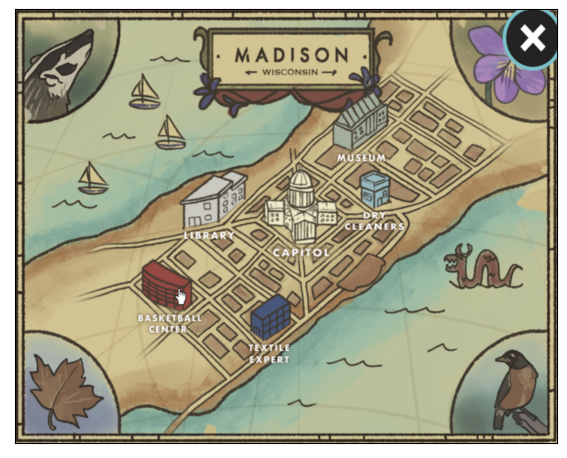

In [12]:
images = os.listdir('../input/event-names/map_hover')
images.sort()
img_arr = []

def img_reshape(img):
    img = Image.open('../input/event-names/map_hover/'+img).convert('RGB')
    img = img.resize((1000,800))
    img = np.asarray(img)
    return img

for image in images:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(7., 7.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [13]:
print('Examples of map_hover:')
print()
train.iloc[667:671,[0,3,4,11,13]]

Examples of map_hover:



session_id      event_name       name  hover_duration  \
667  20090312431273200  navigate_click  undefined             NaN   
668  20090312431273200       map_hover      basic            66.0   
669  20090312431273200       map_hover      basic           266.0   
670  20090312431273200       map_click  undefined             NaN   

                 fqid  
667             tomap  
668  tunic.drycleaner  
669   tunic.capitol_2  
670    tunic.wildlife

# 7. map_click

When the student click on a place on the map to go there, it's a map_click!

# 8. notebook_click

After we've found the notebook during the opening scenes of the game, the notebook stays at the bottom left corner of the screen for the entire duration of the game. Whenever we want, we can can click on it to look for notes made by Jo. Clicking on the notebook to open it, clicking on any page of the notebook, clicking on next or previous button and closing the notebook, all are notebook_clicks.

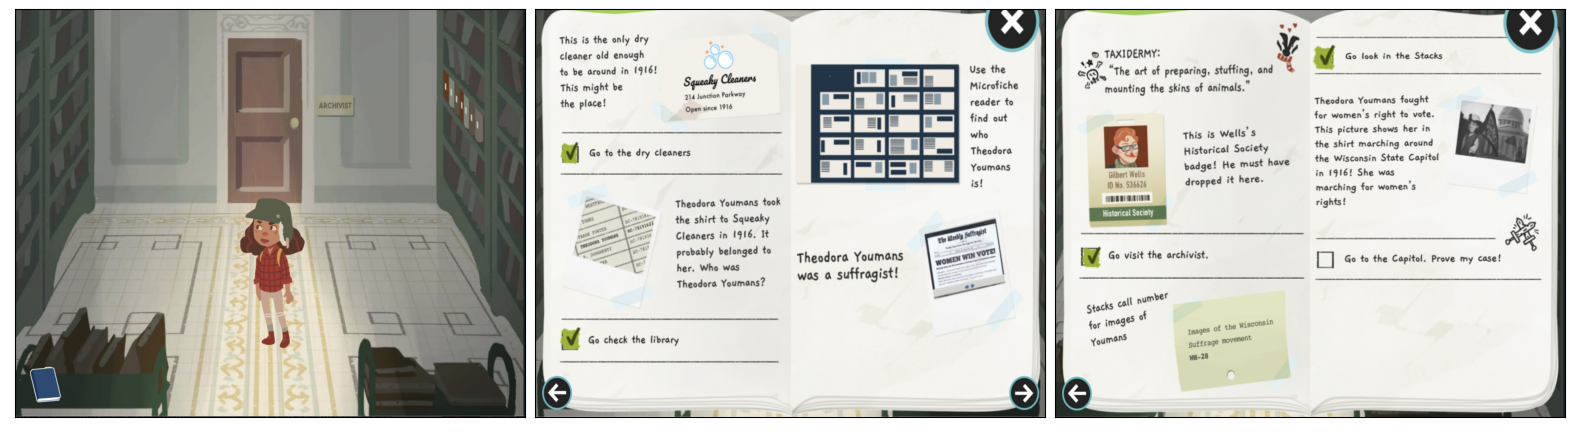

In [14]:
images = os.listdir('../input/event-names/notebook_click')
images.sort()
img_arr = []

def img_reshape(img):
    img = Image.open('../input/event-names/notebook_click/'+img).convert('RGB')
    img = img.resize((1000,800))
    img = np.asarray(img)
    return img

for image in images:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [15]:
print('Examples of notebook_click:')
print()
train.iloc[2224:2234,[0,3,4]]

Examples of notebook_click:



session_id      event_name   name
2224  20090312433251036  notebook_click   open
2225  20090312433251036  notebook_click  basic
2226  20090312433251036  notebook_click   prev
2227  20090312433251036  notebook_click   next
2228  20090312433251036  notebook_click  basic
2229  20090312433251036  notebook_click  basic
2230  20090312433251036  notebook_click  basic
2231  20090312433251036  notebook_click  basic
2232  20090312433251036  notebook_click  basic
2233  20090312433251036  notebook_click  close

# 9. checkpoint

Checkpoint is the last event of a level-group/chapter in the data. The questions that we have to predict are asked after this point in the game.

In [16]:
print('Examples of checkpoint:')
print()
train.iloc[[164,460,880],[0,3,4,5,-1]]

Examples of checkpoint:



session_id  event_name   name  level level_group
164  20090312431273200  checkpoint  basic      4         0-4
460  20090312431273200  checkpoint  basic     12        5-12
880  20090312431273200  checkpoint  basic     22       13-22

### Thank you for reading the notebook :)

I hope it helped you in some way.
If you have any question, please feel free to ask me. 